### Emotion Detector App using Streamlit
- Detecting emotion
- Text Classifier

In [ ]:
# ! pip install <package name>

In [48]:
# Import Packages

import joblib

# Exploratory Data Analysis (EDA) Packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Text Cleaning 
import neattext.functions as nfx

# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Setting properties
pd.set_option('display.max_colwidth', None)

In [2]:
# Load the dataset
df = pd.read_csv("../data/emotion_dataset_raw.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [6]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM
3,joy,"Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself ."
4,joy,"@Iluvmiasantos ugh babe.. hugggzzz for u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang"


In [8]:
df['Emotion'].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

In [7]:
# Counting rows for Emotion types
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

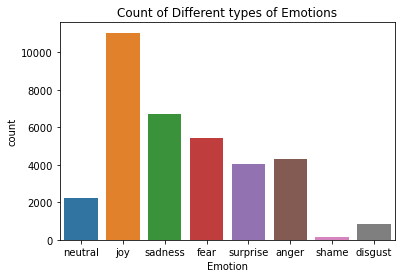

In [12]:
### Plot count of emotions
sns.countplot(x='Emotion', data=df)
plt.title("Count of Different types of Emotions")
plt.show()

In [13]:
df.shape

(34792, 2)

In [15]:
df.drop_duplicates().shape

(31162, 2)

In [16]:
34792-31162

3630

In [17]:
df = df.drop_duplicates()

In [19]:
df.drop_duplicates(['Text']).shape

(31110, 2)

In [20]:
# Students are very smart. Joy
# Students are very smart. Happy

# one vs all classifiers (binary)

In [21]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [23]:
# Removing Stopwords
df['CleanText'] = df['Text'].apply(nfx.remove_stopwords)

<ipython-input-23-548b0c7a0eb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CleanText'] = df['Text'].apply(nfx.remove_stopwords)


In [24]:
# Removing user handles
df['CleanText'] = df['CleanText'].apply(nfx.remove_userhandles)

<ipython-input-24-984df39cbf09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CleanText'] = df['CleanText'].apply(nfx.remove_userhandles)


In [25]:
# punctuation, removing dates, removing special characters, etc

In [ ]:
Target Variable- labels, dependent variable : Emotion
Features- independent variables : CleanText

In [26]:
df.head()

,Emotion,Text,CleanText
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS SHOWS BLESSED
3,joy,"Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself .","eye ! true hazel eye-and brilliant ! Regular features , open countenance , complexion , Oh ! bloom health , pretty height size ; firm upright figure ! health , merely bloom , air , head , glance . hears child ' picture health ' ; , gives idea complete picture grown-up health . loveliness ."
4,joy,"@Iluvmiasantos ugh babe.. hugggzzz for u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang","ugh babe.. hugggzzz u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam fil ko ang"


In [40]:
x_train, x_test, y_train, y_test = train_test_split(
    df['CleanText'], df['Emotion'], test_size=0.20, random_state=30)

In [41]:
pipeline_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [42]:
# Train model
pipeline_lr.fit(x_train, y_train)

/Users/shadabhussain/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [43]:
sample_sent = "I am feeling good"

In [44]:
pipeline_lr.predict([sample_sent])

array(['joy'], dtype=object)

In [45]:
pipeline_lr.predict_proba([sample_sent])

array([[0.02376151, 0.06957426, 0.03598111, 0.50124567, 0.10050459,
        0.15292516, 0.00225024, 0.11375747]])

In [46]:
pipeline_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [47]:
pipeline_lr.score(x_test, y_test)

0.5812386351481442

In [50]:
with open("../models/emotion_classifier.pkl", "wb") as ec:
    joblib.dump(pipeline_lr, ec)